In [1]:

from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt


%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Worked with Mei Guan and QY Goh

In [2]:
# ove the downloaded data to PUI data
import os
print("PUIdata", os.getenv("PUIDATA"))
#this works in the command line, but is not working in the jupyter notebook when putting data in place

#create the env variable if missing-- needed to create
#added PUI2018 to path 
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))


# # move the data
# !mv bustimes.txt $PUIDATA

PUIdata /nfshome/sjf374/PUIdata
PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [3]:
#from homework 4 citibikes example-- adapted from to adjust for environment variables

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
#chose June 2016 
datestring = '201606'
getCitiBikeCSV(datestring)

file in place, you can continue


### Define Hypothesis

IDEA: more people bike on sundays than saturdays

Null hypothesis: average trips per sunday is less than average trips per saturday in january. 

Alternative hypothesis:  average trips per sunday is more than or equal to than average trips per saturday in january. 

p = .05

#### Equation
_$H_0$ : $\frac{sat_{\mathrm{tripquantity}}}{sat_{\mathrm{totalsaturdays}}} => \frac{sun_{\mathrm{tripquantity}}}{sun_{\mathrm{totalsaturdays}}}$

_$H_1$ : $\frac{sat_{\mathrm{tripquantity}}}{sat_{\mathrm{totalsaturdays}}} < \frac{sun_{\mathrm{tripquantity}}}{sun_{\mathrm{totalsaturdays}}}$

In [5]:
#confirmed that the data loaded

In [6]:
citibikedf = pd.read_csv("%s/%s-citibike-tripdata.csv" % (os.getenv("PUIDATA"), datestring))

In [7]:
citibikedf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [8]:
#using start time

In [9]:
len(citibikedf.index)

1460318

In [10]:
citibikedf['usertype'].value_counts()

Subscriber    1303486
Customer       156832
Name: usertype, dtype: int64

In [11]:
citibikedf['birth year'].unique()

array([ 1972.,  1967.,  1989.,  1991.,  1974.,  1986.,  1968.,  1971.,
        1964.,  1952.,  1982.,  1969.,  1975.,  1985.,  1970.,  1994.,
        1961.,  1963.,  1995.,  1992.,  1984.,  1988.,  1987.,  1983.,
        1979.,  1990.,    nan,  1977.,  1973.,  1981.,  1951.,  1956.,
        1960.,  1993.,  1966.,  1980.,  1976.,  1997.,  1962.,  1978.,
        1959.,  1954.,  1996.,  1945.,  1955.,  1998.,  1958.,  1953.,
        1950.,  1957.,  1965.,  1948.,  1999.,  1949.,  1941.,  1944.,
        1946.,  1947.,  1943.,  1942.,  1940.,  1885.,  1900.,  1917.,
        1936.,  2000.,  1938.,  1923.,  1907.,  1935.,  1939.,  1901.,
        1933.,  1932.,  1920.,  1937.,  1921.,  1899.,  1888.,  1912.,
        1910.,  1918.,  1887.,  1934.,  1913.,  1926.,  1925.,  1931.,
        1894.])

In [12]:
citibikedf.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.265112e+06,1.460318e+06
mean,9.897580e+02,9.562393e+02,4.073736e+01,-7.398694e+01,9.457872e+02,4.073696e+01,-7.398677e+01,2.051037e+04,1.977659e+03,1.079696e+00
std,7.589179e+03,1.101579e+03,2.277217e-02,1.641347e-02,1.093657e+03,7.874038e-02,1.378920e-01,3.454210e+03,1.157717e+01,5.872326e-01
min,6.100000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,7.200000e+01,0.000000e+00,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.050000e+02,3.280000e+02,4.072080e+01,-7.399906e+01,3.280000e+02,4.072066e+01,-7.399915e+01,1.748200e+04,NaN,1.000000e+00
50%,6.760000e+02,4.530000e+02,4.073818e+01,-7.398890e+01,4.500000e+02,4.073782e+01,-7.398890e+01,2.052900e+04,NaN,1.000000e+00
75%,1.143000e+03,5.300000e+02,4.075383e+01,-7.397769e+01,5.290000e+02,4.075300e+01,-7.397771e+01,2.362800e+04,NaN,1.000000e+00
max,3.129291e+06,3.260000e+03,4.078721e+01,-7.392989e+01,3.260000e+03,4.078721e+01,0.000000e+00,2.603700e+04,2.000000e+03,2.000000e+00


In [13]:
citibikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460318 entries, 0 to 1460317
Data columns (total 15 columns):
tripduration               1460318 non-null int64
starttime                  1460318 non-null object
stoptime                   1460318 non-null object
start station id           1460318 non-null int64
start station name         1460318 non-null object
start station latitude     1460318 non-null float64
start station longitude    1460318 non-null float64
end station id             1460318 non-null int64
end station name           1460318 non-null object
end station latitude       1460318 non-null float64
end station longitude      1460318 non-null float64
bikeid                     1460318 non-null int64
usertype                   1460318 non-null object
birth year                 1265112 non-null float64
gender                     1460318 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 167.1+ MB


In [14]:
#make the starttime a datetime object
citibikedf['starttime'] = pd.to_datetime(citibikedf['starttime'])

In [15]:
#pulls out the weekday from each of the startdates and makes them a new column
#https://docs.python.org/2/library/datetime.html
#Monday is 0 and Sunday is 6
citibikedf['weekday'] = citibikedf['starttime'].apply(lambda x: x.weekday())

In [16]:
citibikedf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,weekday
0,1470,2016-06-01 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2
1,229,2016-06-01 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2
2,344,2016-06-01 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2
3,1120,2016-06-01 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2
4,229,2016-06-01 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2


In [17]:
#create new column with date only
citibikedf['date_only'] = citibikedf['starttime'].apply(lambda x: x.date())

In [18]:
#check to make sure all weekdays present
citibikedf['weekday'].value_counts()

2    262595
3    261553
1    209782
4    200696
0    200488
5    173908
6    151296
Name: weekday, dtype: int64

In [19]:
#confirm all dates present
citibikedf['date_only'].unique()

array([datetime.date(2016, 6, 1), datetime.date(2016, 6, 2),
       datetime.date(2016, 6, 3), datetime.date(2016, 6, 4),
       datetime.date(2016, 6, 5), datetime.date(2016, 6, 6),
       datetime.date(2016, 6, 7), datetime.date(2016, 6, 8),
       datetime.date(2016, 6, 9), datetime.date(2016, 6, 10),
       datetime.date(2016, 6, 11), datetime.date(2016, 6, 12),
       datetime.date(2016, 6, 13), datetime.date(2016, 6, 14),
       datetime.date(2016, 6, 15), datetime.date(2016, 6, 16),
       datetime.date(2016, 6, 17), datetime.date(2016, 6, 18),
       datetime.date(2016, 6, 19), datetime.date(2016, 6, 20),
       datetime.date(2016, 6, 21), datetime.date(2016, 6, 22),
       datetime.date(2016, 6, 23), datetime.date(2016, 6, 24),
       datetime.date(2016, 6, 25), datetime.date(2016, 6, 26),
       datetime.date(2016, 6, 27), datetime.date(2016, 6, 28),
       datetime.date(2016, 6, 29), datetime.date(2016, 6, 30)], dtype=object)

In [20]:
#checkout the size of each date and within each weekday
pd.DataFrame(citibikedf[['weekday', 'date_only']].groupby(['weekday', 'date_only']).size())

0
weekday date_only        
0       2016-06-06  52149
        2016-06-13  49069
        2016-06-20  52247
        2016-06-27  47023
1       2016-06-07  51812
        2016-06-14  54813
        2016-06-21  53564
        2016-06-28  49593
2       2016-06-01  54665
        2016-06-08  42250
        2016-06-15  55049
        2016-06-22  55749
        2016-06-29  54882
3       2016-06-02  54401
        2016-06-09  52905
        2016-06-16  46198
        2016-06-23  53206
        2016-06-30  54843
4       2016-06-03  38975
        2016-06-10  53299
        2016-06-17  54236
        2016-06-24  54186
5       2016-06-04  40977
        2016-06-11  41030
        2016-06-18  48901
        2016-06-25  43000
6       2016-06-05  22397
        2016-06-12  40637
        2016-06-19  45270
        2016-06-26  42992

In [21]:
#make into a new dataframe to graph all days

In [22]:
graphunredacted = pd.DataFrame(citibikedf.groupby(['weekday', 'date_only']).size()).reset_index()
graphunredacted.columns = ['weekday', 'date_only', 'count']

Text(0,0.5,'Trips')

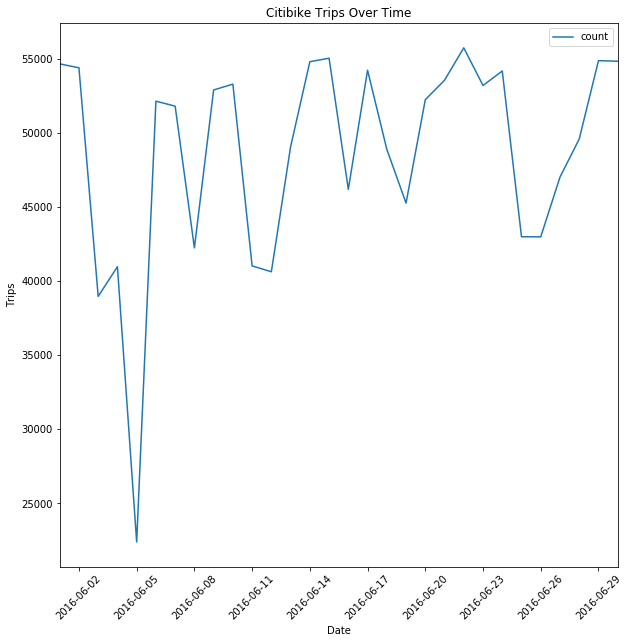

In [23]:
#graph count of all days
graphunredacted.plot.line(x= 'date_only', y ='count' ,rot = 45, figsize = (10,10))
plt.title('Citibike Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Trips')

figure 1: The graph of total trips for each day in June 2016. 6/5/2016 seems to show an unsual dip for this sample

In [24]:
citibikedf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,weekday,date_only
0,1470,2016-06-01 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2,2016-06-01
1,229,2016-06-01 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2,2016-06-01
2,344,2016-06-01 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2,2016-06-01
3,1120,2016-06-01 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2,2016-06-01
4,229,2016-06-01 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2,2016-06-01


In [25]:
#create a working dataframe for specific to begin testing hypothesis
wcitidf = citibikedf[['weekday', 'date_only']]

In [26]:
wcitidf = wcitidf[wcitidf['weekday'] > 4]

In [27]:
wcitidf.head()

,weekday,date_only
148041,5,2016-06-04
148042,5,2016-06-04
148043,5,2016-06-04
148044,5,2016-06-04
148045,5,2016-06-04


In [28]:
# confirm the changes
wcitidf['weekday'].value_counts()

5    173908
6    151296
Name: weekday, dtype: int64

In [29]:
#create a new dataframe that will graph the counts of each day for sat and sunday
tographdays = pd.DataFrame(wcitidf.groupby([ 'date_only', 'weekday']).size()).reset_index()

In [30]:
tographdays.head()

,date_only,weekday,0
0,2016-06-04,5,40977
1,2016-06-05,6,22397
2,2016-06-11,5,41030
3,2016-06-12,6,40637
4,2016-06-18,5,48901


In [31]:
tographdays

,date_only,weekday,0
0,2016-06-04,5,40977
1,2016-06-05,6,22397
2,2016-06-11,5,41030
3,2016-06-12,6,40637
4,2016-06-18,5,48901
5,2016-06-19,6,45270
6,2016-06-25,5,43000
7,2016-06-26,6,42992


In [32]:
tographdays.columns

Index(['date_only', 'weekday', 0], dtype='object')

In [33]:
#rename columns
tographdays.columns = ['date_only', 'weekday', 'count']

In [34]:
##https://python-graph-gallery.com/11-grouped-barplot/
#used this documentation to graph

#create two subsets of data (sat and sun)
sat = tographdays[tographdays['weekday'] == 5]['count']
sun = tographdays[tographdays['weekday'] == 6]['count']

#set specific widths so bars line up
barWidth = 0.25
satwidth = np.arange(len(sat))
sunwidth = [x + barWidth for x in satwidth]



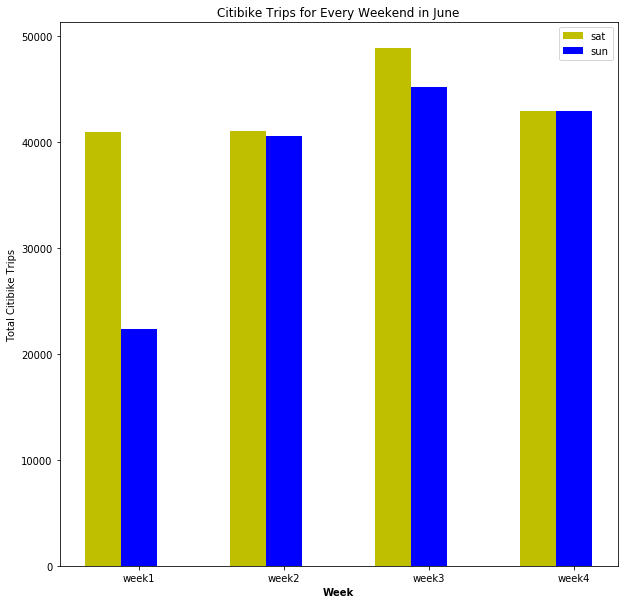

In [35]:
#plot figure
plt.figure(figsize=(10,10))


plt.bar(satwidth, sat, color='y', width=barWidth, label='sat')
plt.bar(sunwidth, sun, color='b', width=barWidth, label='sun')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(sat))], ['week1', 'week2', 'week3', 'week4', 'week5'])

plt.title('Citibike Trips for Every Weekend in June')
plt.ylabel('Total Citibike Trips')

plt.xlabel('Week')


plt.legend()
plt.show()


figure 2: This shows the count of citibike trips for each week and compares saturday to sunday amounts. Though not a true test, this graph does yield me to believe the null hypothesis will be able to be rejected


In [36]:
#further manipulation to compare average daily trips for saturdays and sundays in june
avgdaydf = pd.DataFrame(tographdays.groupby(['weekday'])['count'].mean()).reset_index()

In [37]:
avgdaydf.head()

,weekday,count
0,5,43477
1,6,37824


In [38]:
#make it easier to read
avgdaydf.replace(5, 'saturday', inplace=True)

In [39]:
avgdaydf.replace(6, 'sunday', inplace= True)

In [40]:
avgdaydf

,weekday,count
0,saturday,43477
1,sunday,37824


Text(0.5,1,'Average Citibike Trips for Saturday and Sunday in June')

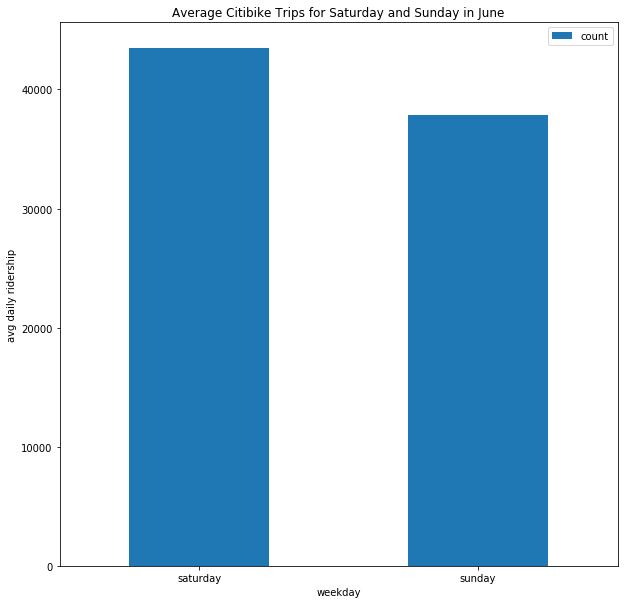

In [41]:
#plot the two numbers
avgdaydf.plot.bar(x= 'weekday', y ='count' , rot= 0, figsize = (10,10))
plt.ylabel('avg daily ridership')
plt.title('Average Citibike Trips for Saturday and Sunday in June')



Figure 3: this data shows that for Saturdays in June, there were more trips on average than sundays in june. Though more data might have a different result as it would comply with the central limit theorum, this sample, does not have the ability to reject the null. 